**NYU Data Science Bootcamp Assignment3**

In [8]:
import pandas as pd

import matplotlib.pyplot as plt

# Read the dataset

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)

# ----- Write your code below this after running above above code-----------

1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.





In [9]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['hour_beginning'].head(5)

<ipython-input-9-c34276f52c74>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


,hour_beginning
0,2019-04-30 00:00:00
1,2019-12-31 22:00:00
2,2019-12-31 23:00:00
3,2019-12-31 21:00:00
4,2019-04-01 03:00:00


In [12]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df_weekdays = df.loc[df.day_name.isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
df_weekdays

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16051,2018-07-12 00:00:00,Brooklyn Bridge,77,39,38,partly-cloudy-night,72.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,7,2018-07-12,Thursday
16052,2018-06-22 04:00:00,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,6,2018-06-22,Friday
16053,2018-07-19 06:00:00,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6,7,2018-07-19,Thursday
16055,2018-07-24 18:00:00,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",18,7,2018-07-24,Tuesday


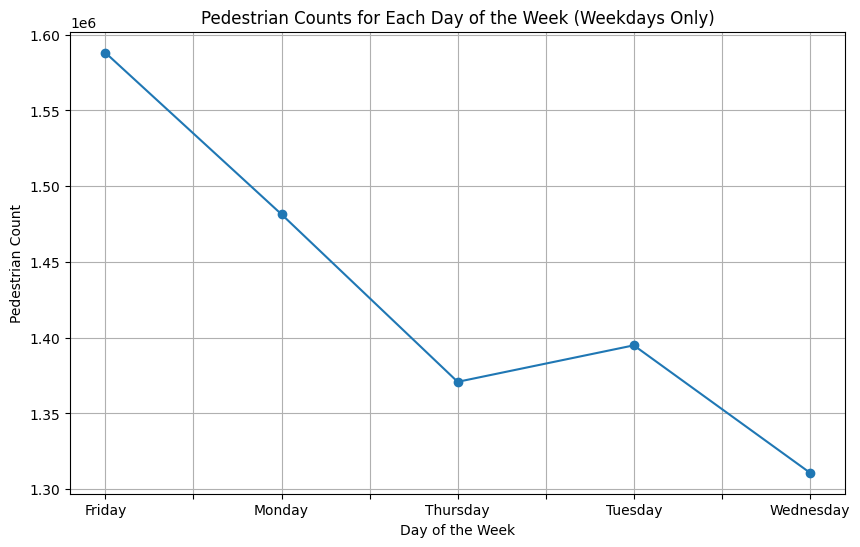

In [30]:
weekday_counts = df_weekdays.groupby('day_name')['Pedestrians'].sum()

plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line', marker='o')
plt.title('Pedestrian Counts for Each Day of the Week (Weekdays Only)')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.show()


2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

 - This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

- Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.


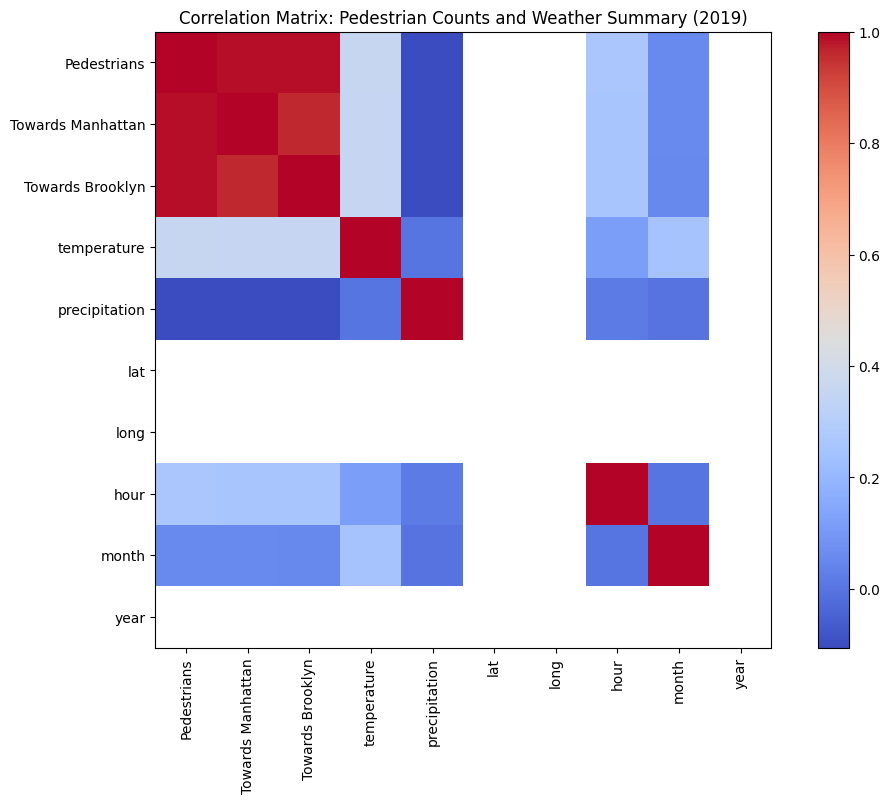

In [20]:
df['year'] = df['hour_beginning'].dt.year
df_2019 = df[df['year'] == 2019]

df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'], drop_first=True)

df_2019_encoded_numeric = df_2019_encoded.select_dtypes(include=['number'])
correlation_matrix = df_2019_encoded_numeric.corr()

plt.figure(figsize=(12, 8))
plt.title("Correlation Matrix: Pedestrian Counts and Weather Summary (2019)")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories.

Use this new column to analyze pedestrian activity patterns throughout the day.

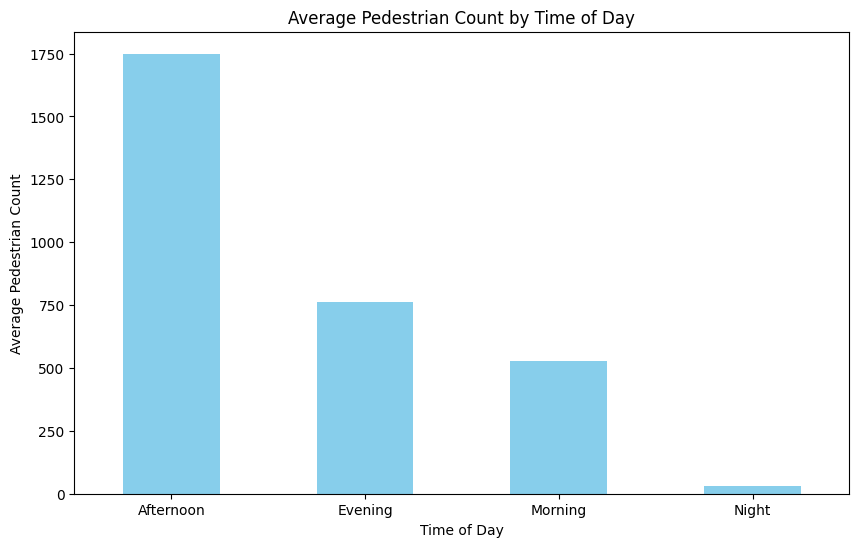

In [35]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

pedestrian_by_time_of_day = df.groupby('time_of_day')['Pedestrians'].mean()

plt.figure(figsize=(10, 6))
pedestrian_by_time_of_day.plot(kind='bar', color='skyblue')
plt.title('Average Pedestrian Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=0)
plt.show()